## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.pyplot import pie, axis, show
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results ,on="Mouse ID", how = "left")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [3]:
summary_table =combined_data.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_table.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar plots

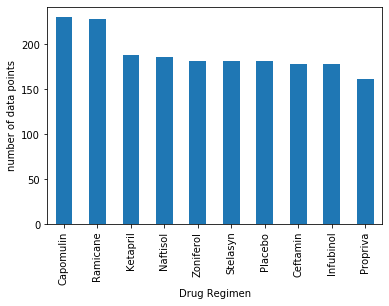

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts =combined_data["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
#plt.xticks(rotate=90 )
plt.ylabel("number of data points")
plt.show()

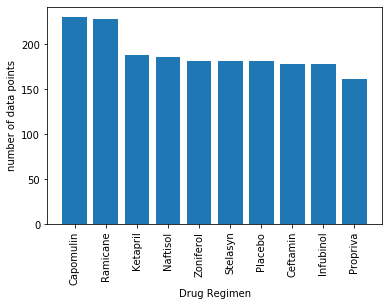

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts =combined_data["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("number of data points")
plt.show()

## Pie plots

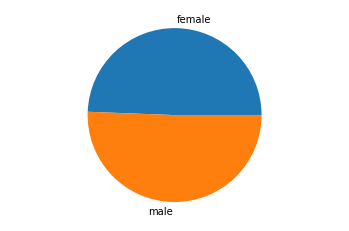

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_count = combined_data["Sex"].value_counts()
Sex_count.head()
df = pd.DataFrame({
    'Sex': ['female', 'male'],
    'Distribution': [935,958]})
sums = df.Distribution.groupby(df.Sex).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

In [7]:
Sex_count = pd.DataFrame(combined_data["Sex"].value_counts())
labels = ["Male", "Female"]
explode = (0.1,0)
plt.pie(gender_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=100)

NameError: name 'gender_count' is not defined

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
regimen_df = combined_data.groupby(["Mouse ID","Drug Regimen" ])
final_volume = regimen_df["Tumor Volume (mm3)"].sum()
final_volume.head(4)


Mouse ID  Drug Regimen
a203      Infubinol       563.127077
a251      Infubinol       552.370946
a262      Placebo         586.116306
a275      Ceftamin        527.709651
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_values = combined_data['']
y_values = combined_data['MEDV']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-9-1e9ceda6a6e3>, line 6)

## Line and scatter plots

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug_df = combined_data.iloc["Drug Regimen"]
drug_df.head()

TypeError: Cannot index by location index with a non-integer key

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = combined_data['Timepoint']
y_values = combined_data['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumor = combined_data['Tumor Volume (mm3)'].mean()
print(avg_tumor)

50.448380631336505


In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = combined_data['Timepoint']
y_values = combined_data['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()